<a href="https://colab.research.google.com/github/Yannlpl/Yannlpl/blob/circleci-project-setup/Analyse_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of COVID-19 Data in France

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Reading of the French hospital data file (this fixed URL gives the official data, it is updated each day)

The file contains, by French department, sex and day: Number of people currently hospitalized, Number of people currently in resuscitation or critical care, Number of people currently in conventional hospitalization services, Number of people currently in long-term care units, Number of people currently in other types of services, Total amount of patient that returned home, Total amout of deaths at the hospital

In [ ]:
df = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7", sep=';')
df

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6
...,...,...,...,...,...,...,...,...,...,...
193060,976,0,2021-12-10,3,1,2.0,0.0,0.0,1323,143
193061,976,1,2021-12-10,0,0,0.0,0.0,0.0,598,84
193062,976,2,2021-12-10,3,1,2.0,0.0,0.0,703,57
193063,978,0,2021-12-10,0,0,0.0,0.0,0.0,0,1


In [ ]:
df.describe()

,sexe,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
count,193065.000000,193065.000000,193065.000000,82960.000000,82960.000000,82960.000000,193065.000000,193065.00000
mean,0.996721,105.580623,16.099531,45.251808,28.175615,1.600000,1518.019921,341.43590
std,0.815823,175.776447,34.050721,76.927646,43.533696,3.487629,2439.461384,517.40579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,15.000000,1.000000,8.000000,4.000000,0.000000,228.000000,48.00000
50%,1.000000,45.000000,5.000000,20.000000,13.000000,0.000000,657.000000,152.00000
75%,2.000000,118.000000,16.000000,49.000000,33.000000,2.000000,1673.000000,399.00000
max,2.000000,3281.000000,855.000000,1006.000000,524.000000,46.000000,26894.000000,4888.00000


Number of hospitalizations per day in France

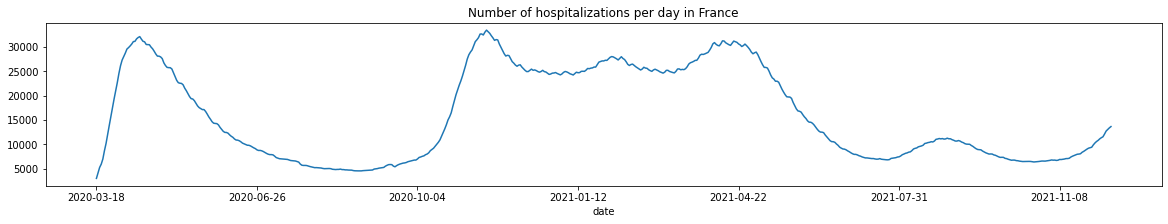

In [ ]:
df_cumul = df[df.sexe==0].groupby(df['jour']).sum()
df_cumul.hosp.plot(figsize=(20,3))
plt.title("Number of hospitalizations per day in France")
plt.xlabel('date')
plt.show()

Number of patients in intensive care in France

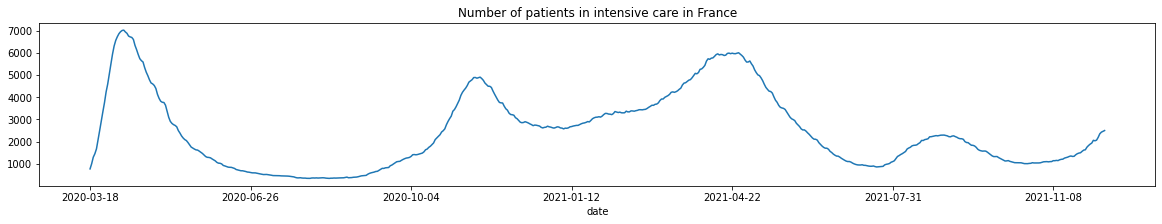

In [ ]:
df_cumul.rea.plot(figsize=(20,3))
plt.title("Number of patients in intensive care in France")
plt.xlabel('date')
plt.show()

Sum of the deaths per day

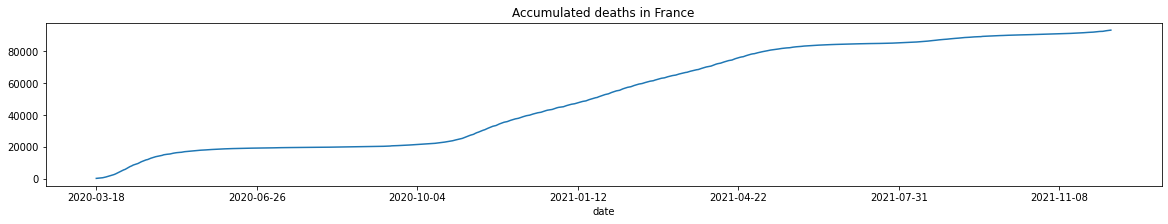

In [ ]:
df_cumul.dc.plot(figsize=(20,3))
plt.title("Accumulated deaths in France")
plt.xlabel('date')
plt.show()

The three curves together

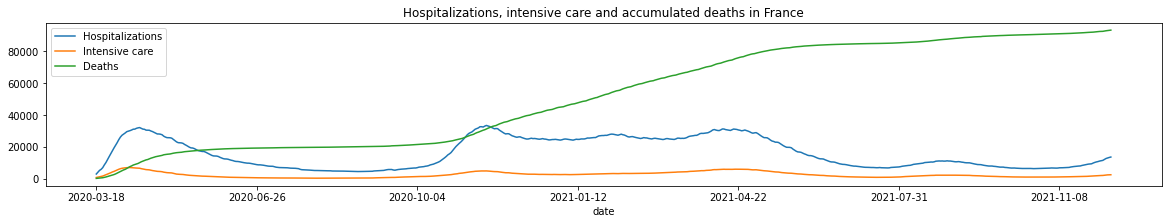

In [ ]:
df_cumul[['hosp', 'rea', 'dc']].plot(figsize=(20,3))
plt.title("Hospitalizations, intensive care and accumulated deaths in France")
plt.xlabel('date')
plt.legend(['Hospitalizations', 'Intensive care', 'Deaths']);
plt.show()

Hospitalizations by sex

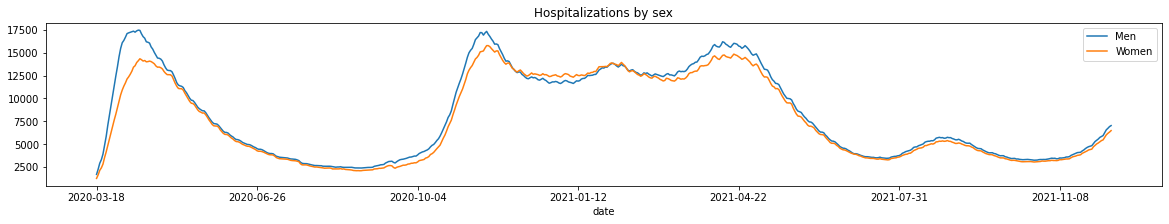

In [ ]:
df_men = df[df.sexe==1].groupby(df.jour).sum()
df_women = df[df.sexe==2].groupby(df.jour).sum()
df_men.hosp.plot(figsize=(20,3))
df_women.hosp.plot()
plt.title("Hospitalizations by sex")
plt.legend(['Men', 'Women'])
plt.xlabel('date')
plt.show()

Sum of deaths by sex

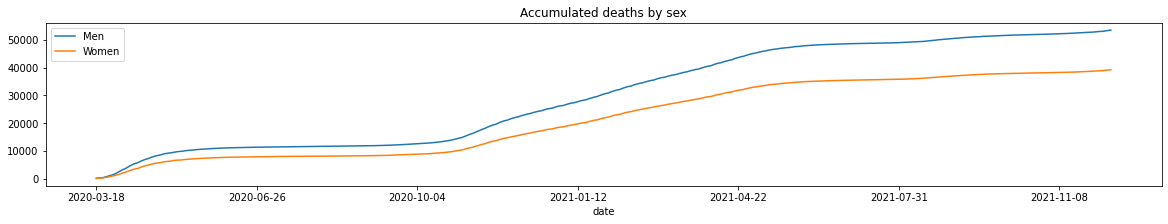

In [ ]:
df_men.dc.plot(figsize=(20,3))
df_women.dc.plot()
plt.legend(['Men', 'Women'])
plt.title("Accumulated deaths by sex")
plt.xlabel('date')
plt.show()

Accumulated deaths repartition by sex

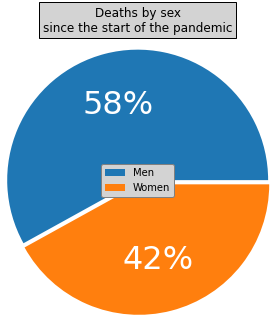

In [ ]:
df_sex = df[df.sexe>=1].groupby(df.sexe).sum()
#df_sex.plot.pie(y='dc', autopct='%1.0f%%', labels=['Men', 'Women'], figsize=(5, 5))
labels = ['Men', 'Women']
plt.title('Deaths by sex\nsince the start of the pandemic', pad=40, bbox={'facecolor':'lightgray'}) # title in a box
plt.pie(df_sex.dc, autopct='%1.0f%%', textprops={'fontsize': 32, 'color':'w'}, labels=None, radius=1.5, explode = (0, 0.05))
legend = plt.legend(labels, loc="center", facecolor="lightgray") # ligth gray backround
legend.get_frame().set_alpha(None) # no transparency
legend.get_frame().set_edgecolor('gray') # gray border
legend.get_frame().set_linewidth(1) # 1 pixel border
plt.show()

In [ ]:
import numpy as np

df_dep_men = df[df.sexe==1].groupby([df.dep]).sum()
df_dep_women = df[df.sexe==2].groupby([df.dep]).sum()

x = df_dep_men.index
y1 = df_dep_men['dc'] / (df_dep_men['dc'] + df_dep_women['dc'])
y2 = df_dep_women['dc'] / (df_dep_men['dc'] + df_dep_women['dc'])

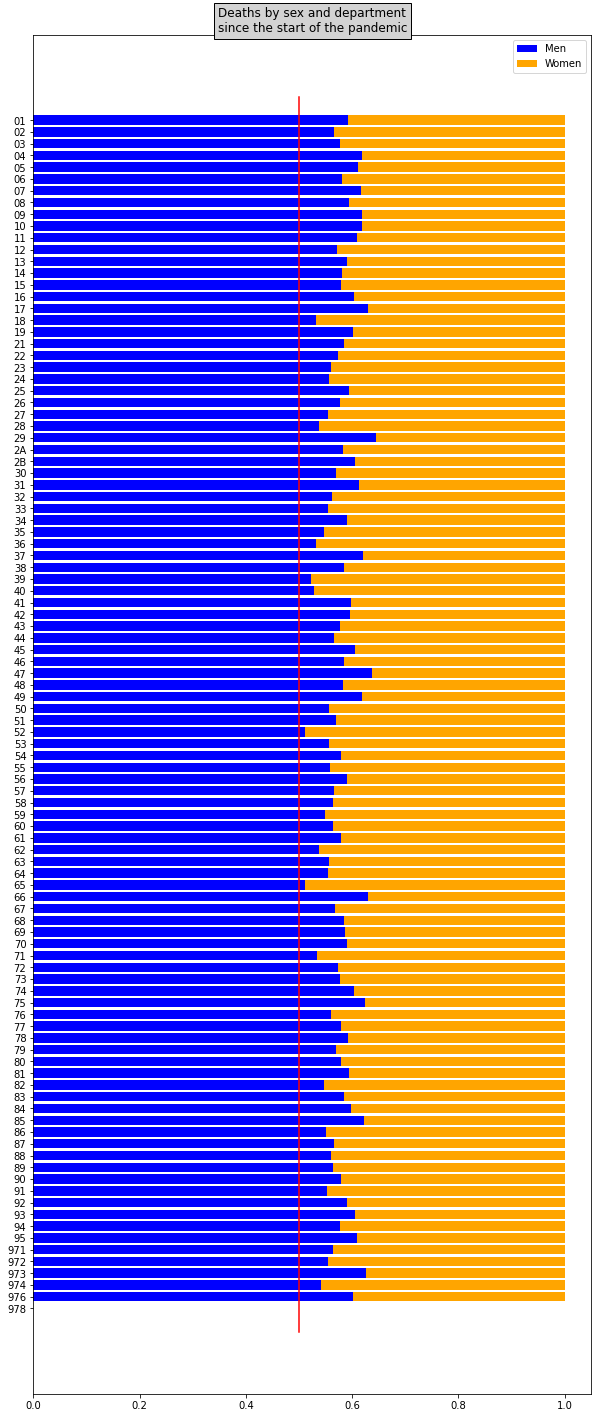

In [ ]:
plt.figure(figsize=(10,25))
plt.title('Deaths by sex and department\nsince the start of the pandemic', bbox={'facecolor':'lightgray'}) # title in a box
plt.barh(x,y1,color="blue",label="Men")
plt.barh(x,y2,color="orange",left =np.array(y1),label="Women")
plt.gca().invert_yaxis()
plt.legend(loc="best")
plt.plot([0.5, 0.5], [-2, 103], "r") # draw line of 50%
plt.show()
